In [1]:
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#conda install -c conda-forge/label/gcc7 missingno
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
#
from sklearn.cluster import KMeans
from sklearn.tree import tree


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,classification_report
from sklearn.tree import export_graphviz
import six
from sklearn import tree
from subprocess import call
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [ ]:
#import the dataset
df = pd.read_csv('C:/Users/TOSHIBA/Downloads/heart.csv')
df.head()
C:\Users\TOSHIBA\Desktop\Fisrt Semester\Data Mining\Project

In [4]:
df.shape

(303, 14)

In [5]:
features = df.columns
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [6]:
#Renaming the column headers for better understanding of visualizations
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ECG_results,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Maximum_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
ECG_results                  int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Major_vessels                int64
Thalassemia_types            int64
Heart_attack                 int64
dtype: object

In [9]:
#1 = Male and 0 = Female in 'Sex' column.
df2 = df.copy()
df1 = df.copy()
df.head()


,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

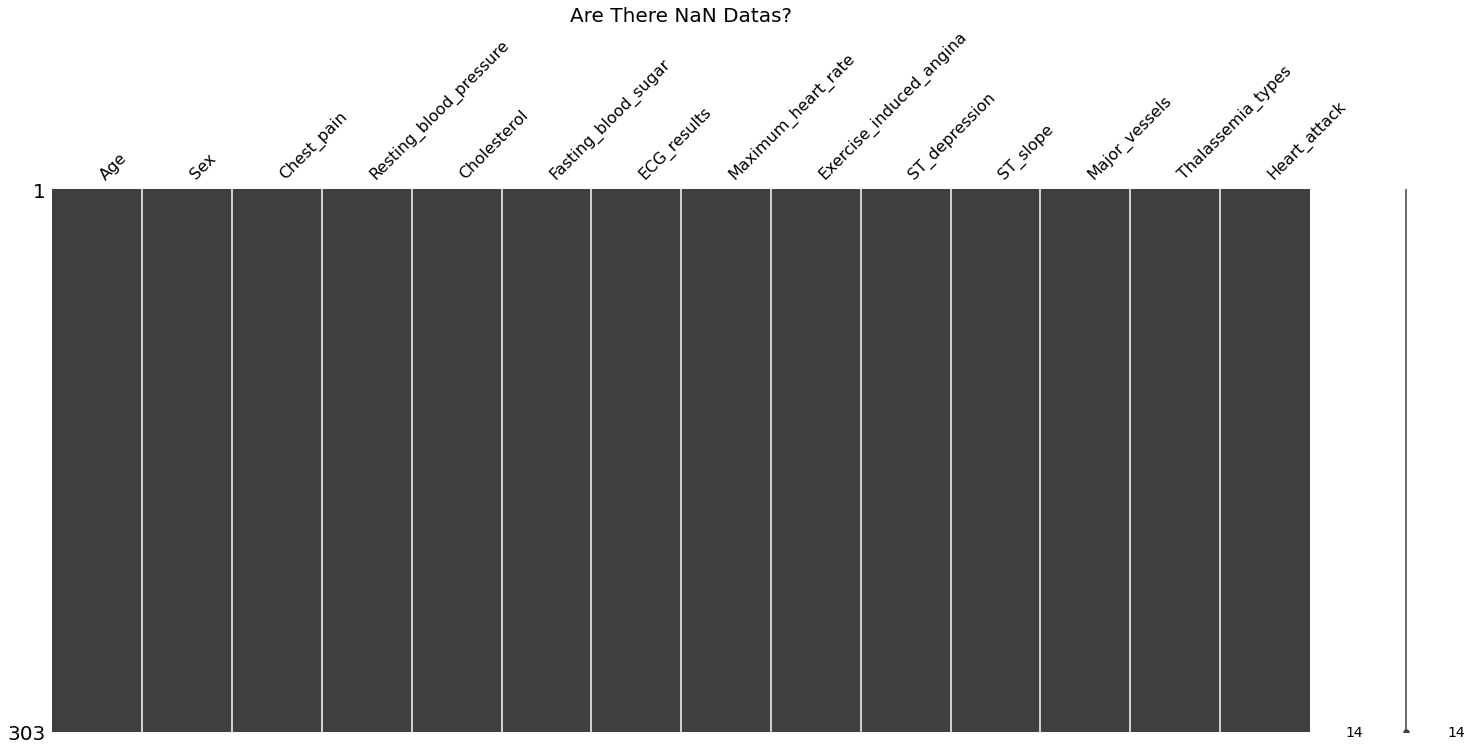

In [11]:
msno.matrix(df)
plt.title("Are There NaN Datas?",fontsize=20)
plt.show()

No empty values in the dataset.

In [12]:
'''''
Replacing the values for Sex and Heart_Attack colummns as these will make the understanding of visualizations
better instead of numeric values.
'''''
df1['Sex'].replace({1:'Male',0:'Female'},inplace = True)
df1['Heart_attack'].replace({1:'Heart_attack - Yes',0:'Heart_attack - No'},inplace = True)

Analysis of data by GroupBy and Cmap

In [13]:
s= df1.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(20).style.background_gradient(cmap='Purples')


,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


In [14]:
s= df1.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


The Males having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for females.

In [15]:
s= df1.groupby(['Sex','Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,Resting_blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


The resting blood pressure and the cases of heart attack for such pressure in case of males and females.

In [16]:
s= df1.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

In [17]:
s= df1.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

In [18]:
s= df1.groupby(['Sex','ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


This shows the lower the ECG Results, the more cases of heart attack occurred.

In [19]:
s= df1.groupby(['Sex','Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,Sex,Maximum_heart_rate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


The maximum heart rate varied for heart attack and were higher for males resulting in heart attack

In [20]:
s= df1.groupby(['Sex','Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


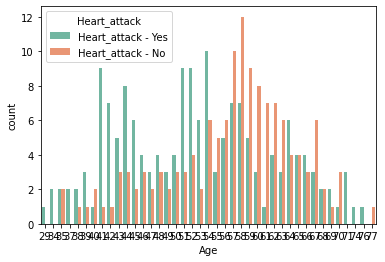

In [21]:
sns.countplot(x = 'Age',hue = 'Heart_attack', data = df1, palette = 'Set2')

Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [22]:
s= df1.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


The lower the depression, the higher the cases were for heart attack.

In [23]:
s= df1.groupby(['Sex','ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,ST_slope,Heart_attack
5,Male,2,96
4,Male,1,95
2,Female,2,46
1,Female,1,45
3,Male,0,16
0,Female,0,5


The higher the slope value, the higher were the cases for Heart attack.

In [24]:
s= df1.groupby(['Sex','Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


The lower the number of vessels blocked, the higher were the heart attack cases. This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

In [25]:
s= df1.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


The higher the Thalassemia type, the higher were the cases of heart attack.

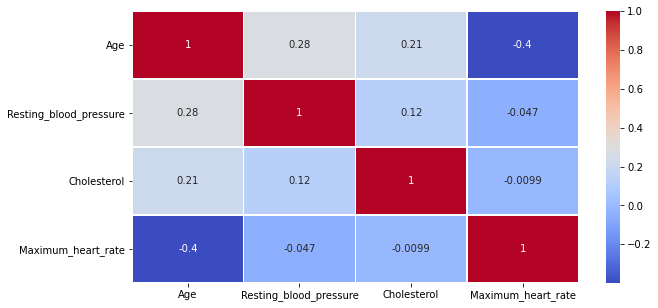

In [26]:
df2.drop(['Sex','Fasting_blood_sugar','Heart_attack','Chest_pain','ECG_results','Exercise_induced_angina','ST_slope','ST_depression','Major_vessels','Thalassemia_types'],axis = 'columns',inplace = True)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

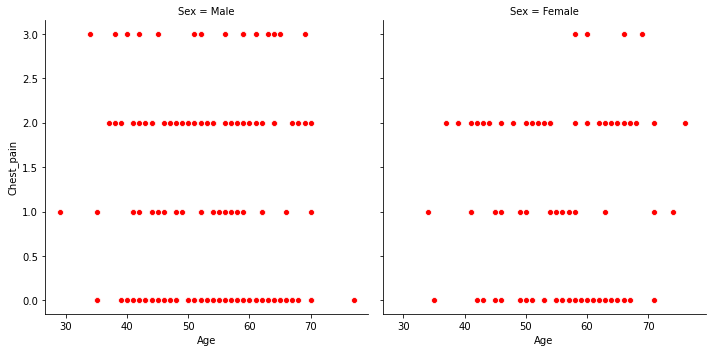

In [27]:
sns.relplot(x ='Age', y ='Chest_pain', col = 'Sex', data = df1, color = 'red', height = 5)

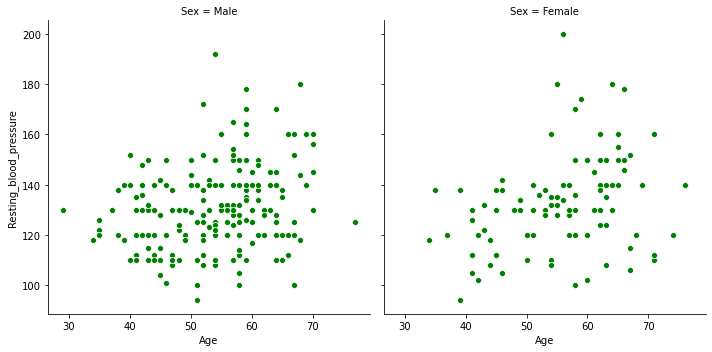

In [28]:
sns.relplot(x ='Age', y ='Resting_blood_pressure', col = 'Sex', data = df1, color = 'green')

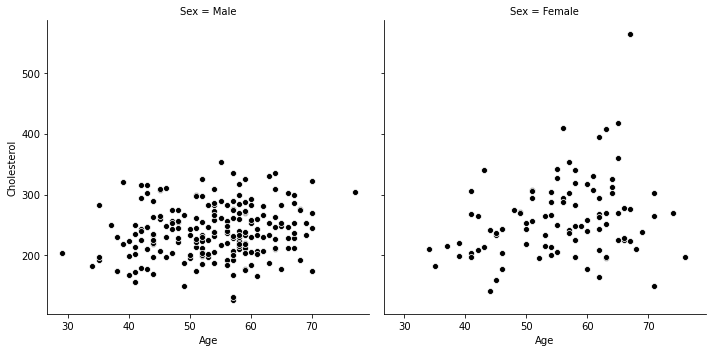

In [29]:
sns.relplot(x ='Age', y ='Cholesterol', col = 'Sex', data = df1, color = 'black')

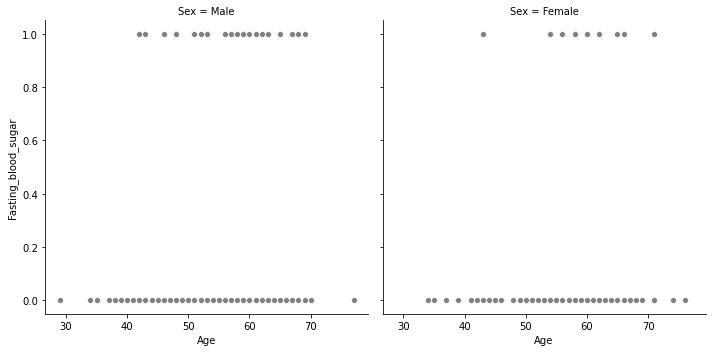

In [30]:
sns.relplot(x ='Age', y ='Fasting_blood_sugar', col = 'Sex', data = df1, color = 'grey')

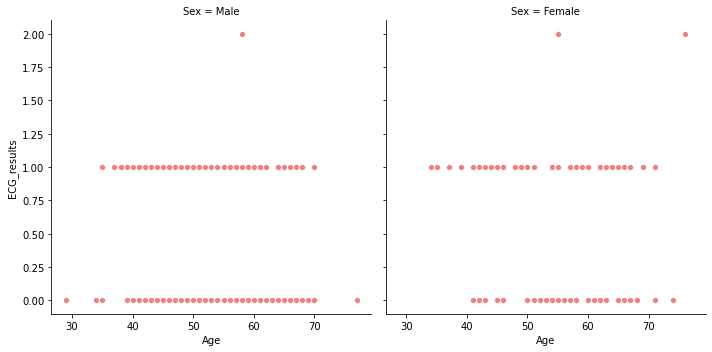

In [31]:
sns.relplot(x ='Age', y ='ECG_results', col = 'Sex', data = df1, color = 'lightcoral')

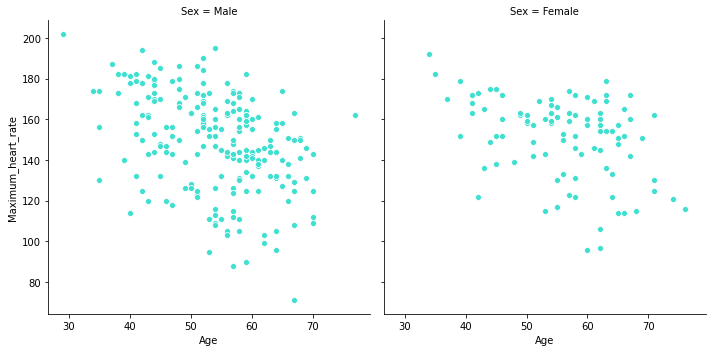

In [32]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', col = 'Sex', data = df1, color = 'turquoise')

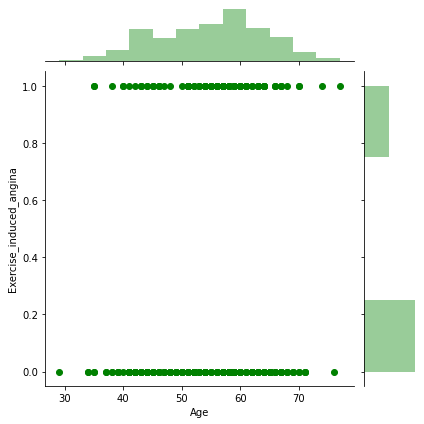

In [33]:
sns.jointplot(x =df['Age'], y =df1['Exercise_induced_angina'], data = df1, color = 'green')

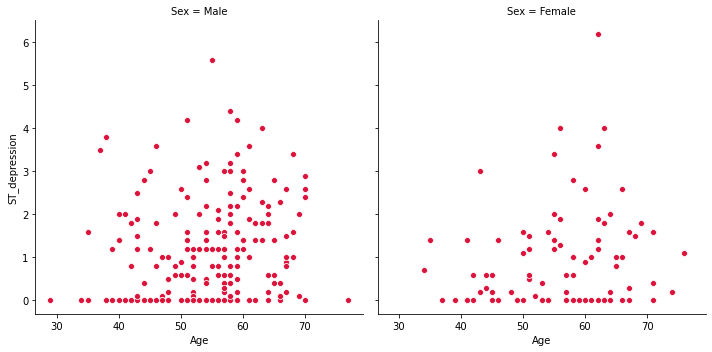

In [34]:
sns.relplot(x ='Age', y ='ST_depression', col = 'Sex', data = df1, color = 'crimson')

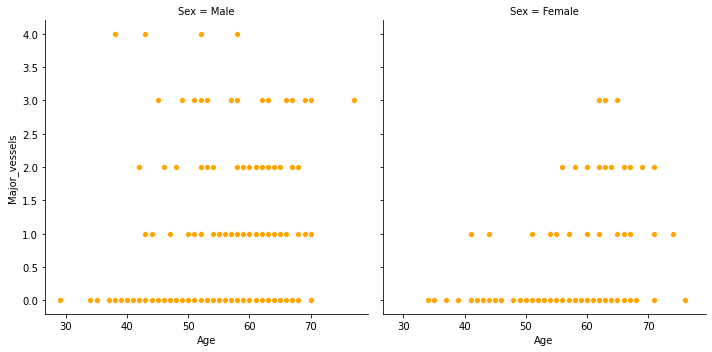

In [35]:
sns.relplot(x ='Age', y ='Major_vessels', col = 'Sex', data = df1, color = 'orange')

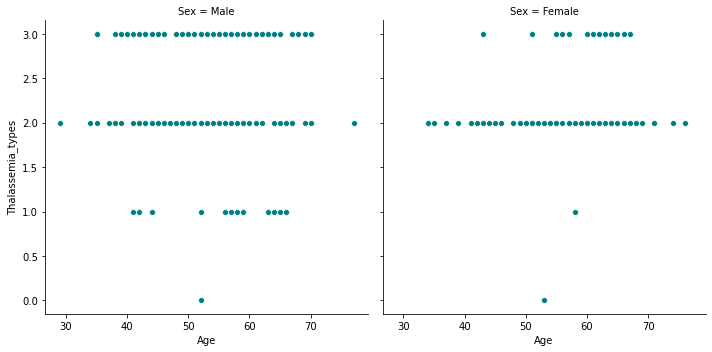

In [36]:
sns.relplot(x ='Age', y ='Thalassemia_types', col = 'Sex', data = df1, color = 'teal')

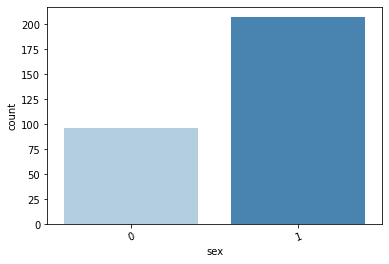

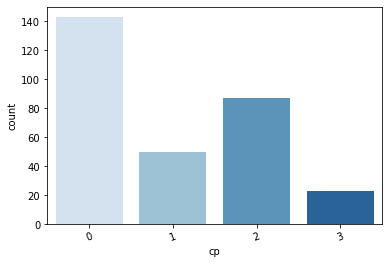

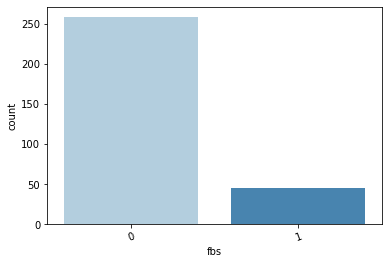

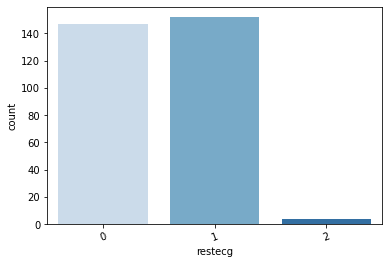

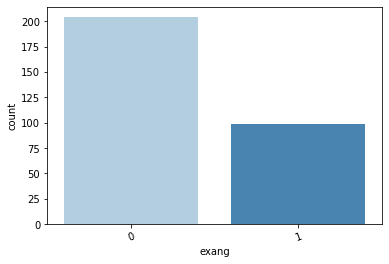

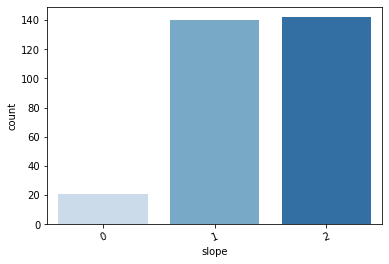

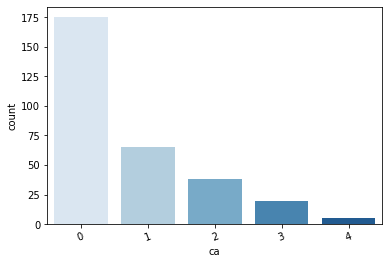

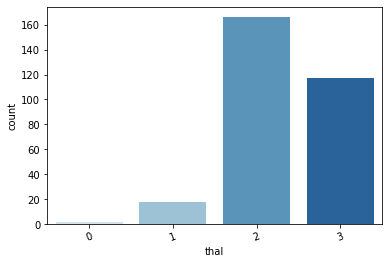

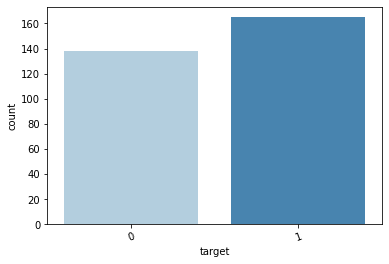

In [37]:
# categorical_data
for num, feature in enumerate(categorical_data):
    plt.figure(num)
    plot = sns.countplot(x=feature, data=data, palette='Blues')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20)

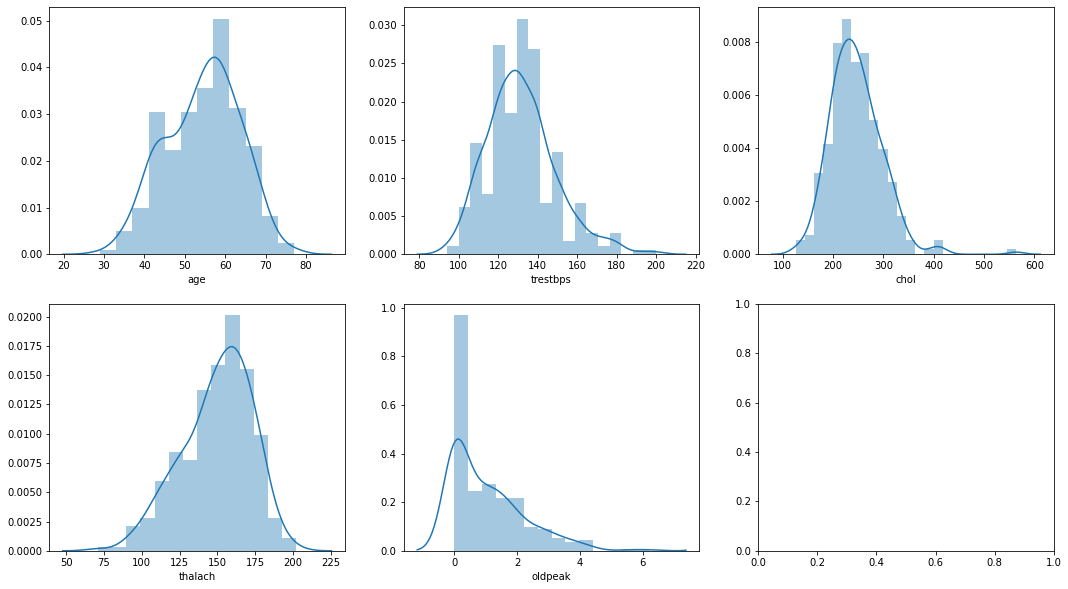

In [38]:
# numerical data
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = np.array(axes).reshape(-1)

for num, feature in enumerate(numerical_data):
    sns.distplot(data[feature], ax=ax[num])

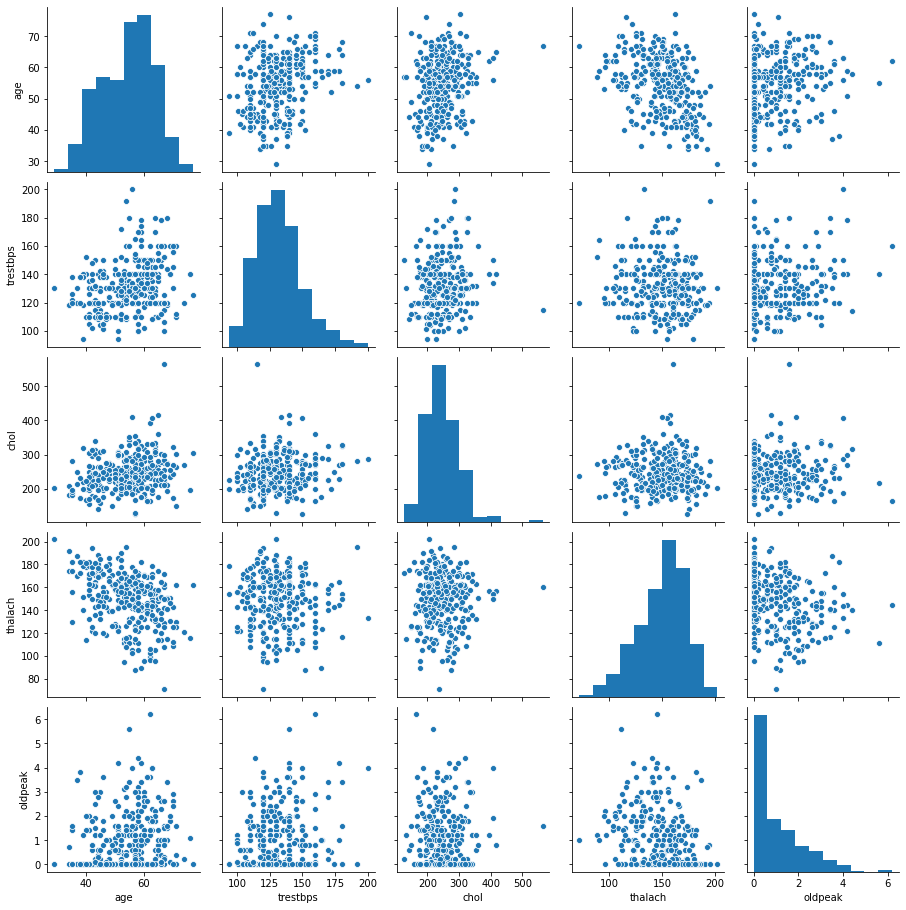

In [39]:
'''''
MULTIVARIATE ANALYSIS
Multivariate analysis can be used to see any relationship between many features. 
The cell below show pair plot between the numerical data.
'''''
sns.pairplot(data[numerical_data])

In [ ]:
# k mean

In [78]:
x = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values

In [79]:
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_

[0 0 2 0 1 2 1 0 2 2 0 0 0 2 0 2 1 0 0 0 0 0 2 0 2 1 2 2 1 2 2 2 2 0 2 2 1
 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 0 2 0 2 2 0 2 1 0 1 2 2 2 2 2 0 2 2 0 2 2 0
 2 0 0 2 2 0 0 1 1 1 0 1 0 2 2 0 0 2 2 0 2 0 1 0 1 0 0 0 2 0 2 2 0 0 0 0 1
 2 1 2 0 2 2 2 2 0 1 0 0 0 2 2 2 0 2 0 2 0 1 0 1 0 2 2 2 0 1 1 2 2 2 0 0 0
 2 2 0 2 0 0 2 2 0 2 2 2 0 1 2 2 2 0 0 0 0 2 0 2 0 2 2 2 0 1 2 0 1 0 1 0 0
 1 0 0 0 2 1 2 2 0 2 1 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 2 1 0 1 0 1 0 0 1 2
 0 0 0 2 0 2 0 1 0 0 0 0 1 1 1 1 1 0 0 0 2 0 2 0 1 0 0 0 1 0 1 1 0 1 0 2 0
 0 0 0 0 0 2 2 1 2 0 0 0 0 0 0 0 2 2 0 1 2 1 2 2 2 2 1 2 0 1 2 2 1 0 2 2 2
 2 2 0 0 2 2 0]


array([[5.57753623e+01, 7.10144928e-01, 1.01449275e+00, 1.34210145e+02,
        2.54072464e+02, 1.73913043e-01, 4.13043478e-01, 1.47985507e+02,
        3.55072464e-01, 1.03115942e+00, 1.32608696e+00, 7.68115942e-01,
        2.37681159e+00],
       [5.62777778e+01, 5.00000000e-01, 7.03703704e-01, 1.33092593e+02,
        3.25981481e+02, 1.29629630e-01, 5.55555556e-01, 1.50740741e+02,
        3.51851852e-01, 1.16666667e+00, 1.48148148e+00, 8.88888889e-01,
        2.33333333e+00],
       [5.16846847e+01, 7.38738739e-01, 1.03603604e+00, 1.27693694e+02,
        1.97774775e+02, 1.26126126e-01, 6.57657658e-01, 1.51180180e+02,
        2.79279279e-01, 9.88288288e-01, 1.45045045e+00, 6.03603604e-01,
        2.22522523e+00]])

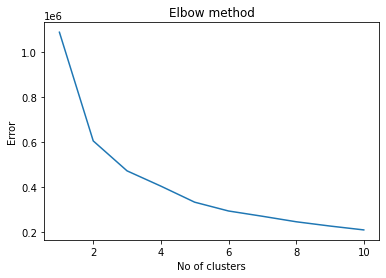

In [80]:
Error =[]
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i).fit(x)
 kmeans.fit(x)
 Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [81]:
X=df[['age','sex','cp',"trestbps","chol",'fbs','restecg',"thalach","exang","oldpeak","slope","ca","thal"]]
x=X.to_numpy()
y=y_kmeans5
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.197453,0.003134,0.009403,0.454455,0.730263,0.003134,0.000000,0.470126,0.000000,0.007209,0.000000,0.0,0.003134,0.003134
1,0.108748,0.002939,0.005878,0.382087,0.734782,0.000000,0.002939,0.549617,0.000000,0.010287,0.000000,0.0,0.005878,0.002939
2,0.136824,0.000000,0.003337,0.433833,0.680784,0.000000,0.000000,0.573994,0.000000,0.004672,0.006674,0.0,0.006674,0.003337
3,0.172879,0.003087,0.003087,0.370454,0.728559,0.000000,0.003087,0.549507,0.000000,0.002470,0.006174,0.0,0.006174,0.003087
4,0.138431,0.000000,0.000000,0.291433,0.859726,0.000000,0.002429,0.395863,0.002429,0.001457,0.004857,0.0,0.004857,0.002429


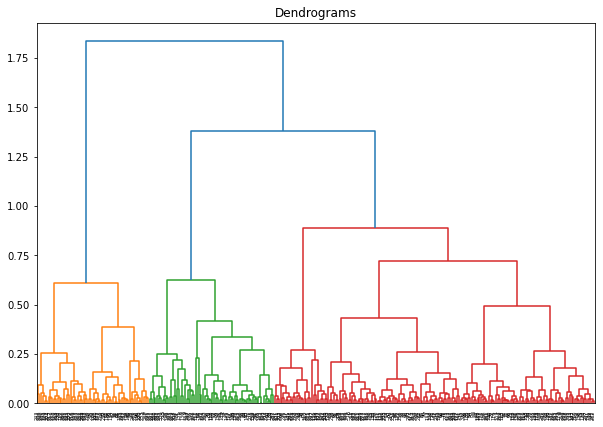

In [82]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))